In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "adsgan"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.058367,-0.044642,0.021802,-0.007191,0.107630,-0.009879,0.043539,-0.036895,0.015490,0.088278,211.427718
1,0.022347,-0.044642,-0.076915,-0.008757,-0.116198,-0.016397,0.090129,0.026250,0.010418,0.017332,197.010955
2,-0.020110,-0.044642,-0.088857,-0.017877,0.045807,0.012059,-0.006437,-0.056054,-0.078127,-0.022319,97.152689
3,-0.000345,-0.044642,-0.079296,-0.012153,0.006620,0.003943,0.021145,-0.044721,-0.025702,0.040163,266.348958
4,-0.064791,-0.044642,-0.072524,-0.081243,-0.042272,-0.039107,-0.005700,-0.006483,-0.005836,0.005222,74.258687
5,-0.004183,-0.044642,-0.049958,0.035836,0.095261,0.036152,0.052934,0.042074,0.001560,0.104593,73.670468
6,-0.044530,-0.044642,0.007921,0.039598,0.023376,0.014693,0.115106,-0.019721,0.030451,-0.011849,264.226341
7,0.034875,-0.044642,-0.000539,0.083001,0.076050,-0.047496,0.097170,0.036305,0.096259,0.131860,130.395025
8,-0.094682,-0.044642,-0.018918,-0.047008,-0.104031,-0.112738,0.098013,-0.049669,-0.038244,0.036815,31.477299
9,-0.044061,-0.044642,-0.034008,-0.035221,0.112886,-0.090776,0.072756,-0.048719,0.101197,0.116866,177.981309


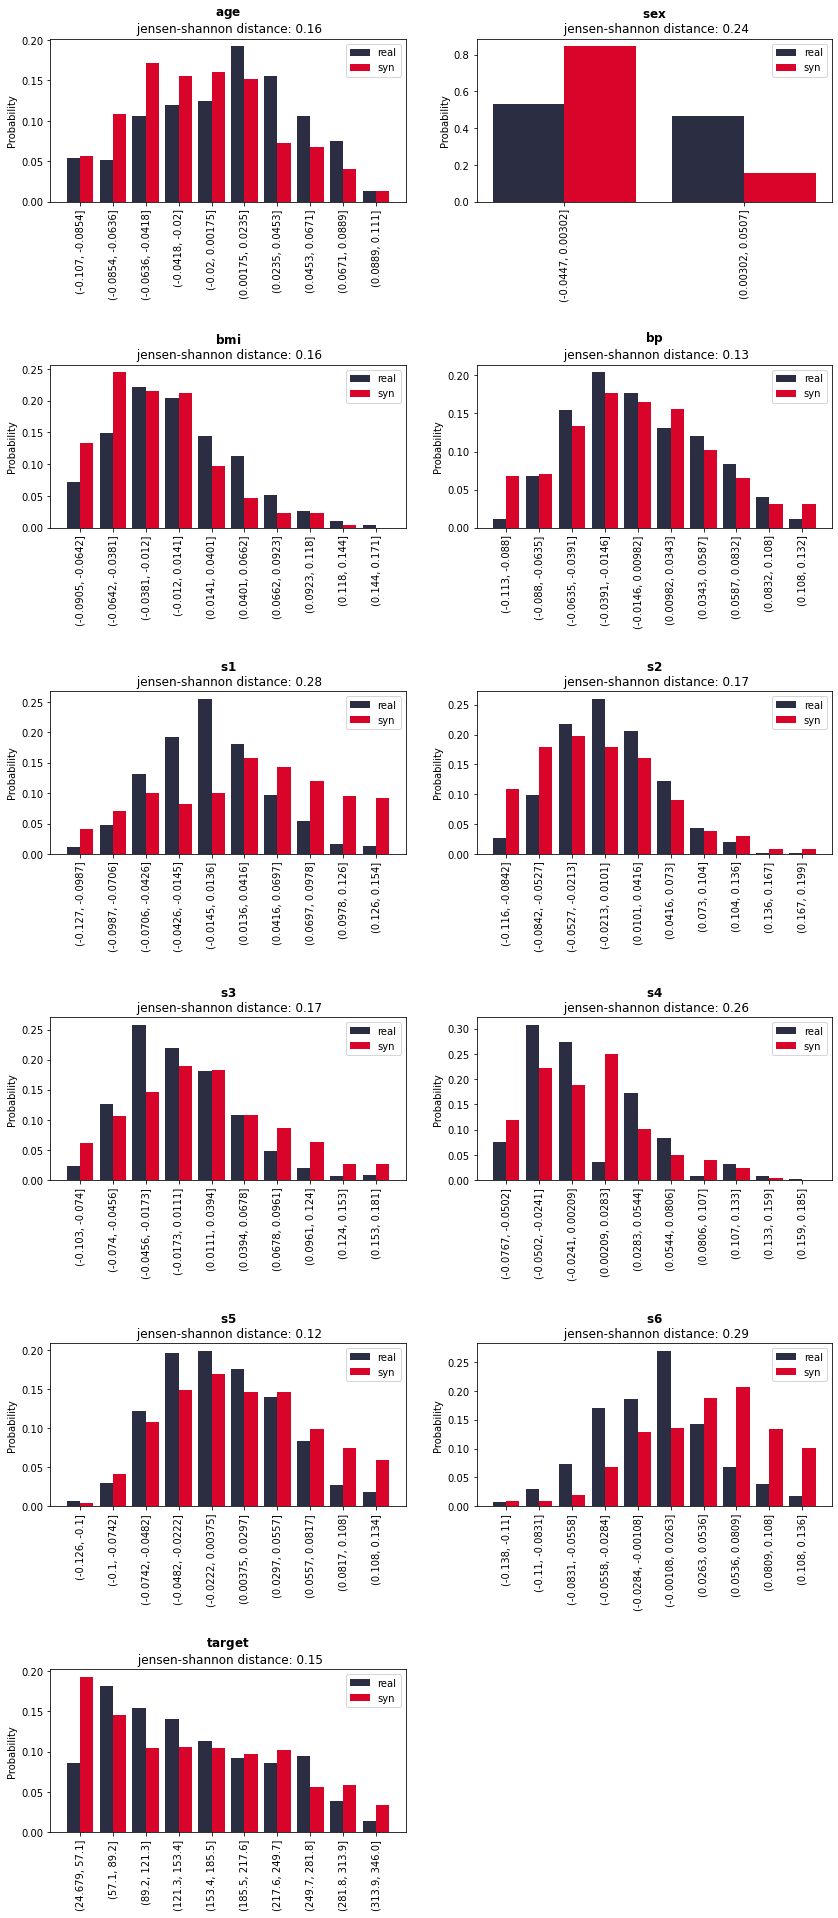

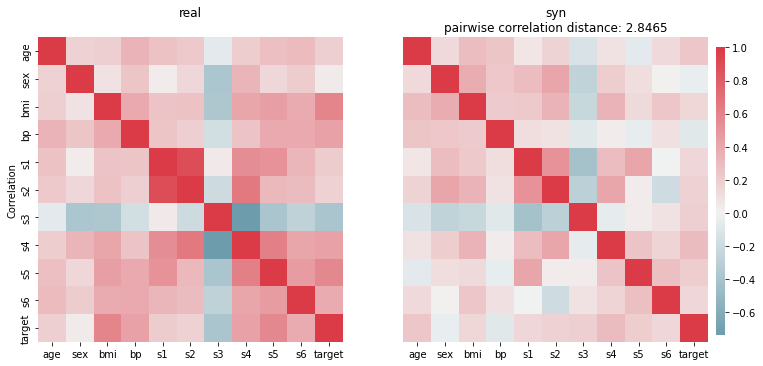

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : adsgan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.029274,0.067601,0.045323,0.016255,0.039094,0.019163,3,0,0.02
sanity.inlier_probability,0.952489,0.99095,0.975867,0.016762,0.984163,0.019231,3,0,0.01
sanity.outlier_probability,0.002262,0.002262,0.002262,0.0,0.002262,0.0,3,0,0.02
statistical.inverse_kl_divergence,0.793541,0.869936,0.84403,0.035705,0.868612,0.038197,3,0,0.03
statistical.kolmogorov_smirnov_test,0.723982,0.819416,0.778281,0.040057,0.791444,0.047717,3,0,0.01
statistical.chi_squared_test,0.88211,0.9584,0.915318,0.031918,0.905443,0.038145,3,0,0.03
statistical.maximum_mean_discrepancy,0.004464,0.005219,0.00472,0.000353,0.004478,0.000378,3,0,0.05
statistical.inverse_cdf_distance,1.769882,1.899982,1.837715,0.053259,1.843282,0.06505,3,0,7.19



[17:22:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
